IN:GET_LOCATION is the second most frequent intent. Split data such that 80% of this intent will be in a different subset.

In [2]:
import pandas as pd

In [3]:
data = pd.read_table('../data/top-dataset-semantic-parsing/train.tsv', names=['text', 'tokens', 'schema'])
data

,text,tokens,schema
0,How long will it take to drive from Chicago to...,How long will it take to drive from Chicago to...,[IN:GET_ESTIMATED_DURATION How long will it ta...
1,Will it take shorter to get to the White House...,Will it take shorter to get to the White House...,[IN:UNSUPPORTED_NAVIGATION Will it take shorte...
2,will I make it to the beach by noon if I leave...,will I make it to the beach by noon if I leave...,[IN:GET_ESTIMATED_ARRIVAL will I make it to [S...
3,When should I leave my house to get to the Ham...,When should I leave my house to get to the Ham...,[IN:GET_ESTIMATED_DEPARTURE When should I leav...
4,I need to know if there's a lot of traffic on ...,I need to know if there 's a lot of traffic on...,[IN:GET_INFO_TRAFFIC I need to know if there '...
...,...,...,...
31274,current traffic at border,current traffic at border,[IN:GET_INFO_TRAFFIC current traffic at [SL:LO...
31275,Fastest route to wax museum in San Francisco,Fastest route to wax museum in San Francisco,[IN:GET_DIRECTIONS Fastest route to [SL:DESTIN...
31276,any christmas shows,any christmas shows,[IN:GET_EVENT any [SL:DATE_TIME christmas ] [S...
31277,Road conditions updates,Road conditions updates,[IN:GET_INFO_ROAD_CONDITION Road conditions up...


In [26]:
get_loc_mask = ['SL:PATH' in text for text in data.schema]
n_get_loc = sum(get_loc_mask)
print(n_get_loc)

1508


In [27]:
n_leave = int(n_get_loc * 0.01)
n_take = n_get_loc - n_leave

print('Take : ', n_take)
print('Leave: ', n_leave)

Take :  1493
Leave:  15


In [28]:
get_loc_mask_ids = [i for i, m in enumerate(get_loc_mask) if m]
get_loc_mask_ids[:10]

[10, 47, 53, 64, 72, 76, 89, 138, 140, 146]

In [29]:
from random import shuffle

In [30]:
shuffle(get_loc_mask_ids)
get_loc_mask_ids[:10]

[7485, 13082, 14753, 4386, 11829, 29425, 10264, 10381, 17295, 6711]

In [31]:
small_subset_ids = get_loc_mask_ids[:n_take]
small_subset = data.iloc[small_subset_ids]

big_subset_ids = list(set(range(len(data))) - set(small_subset_ids))
big_subset = data.iloc[big_subset_ids]

In [32]:
all_schema_tokens = {'IN:COMBINE',
 'IN:GET_CONTACT',
 'IN:GET_DIRECTIONS',
 'IN:GET_DISTANCE',
 'IN:GET_ESTIMATED_ARRIVAL',
 'IN:GET_ESTIMATED_DEPARTURE',
 'IN:GET_ESTIMATED_DURATION',
 'IN:GET_EVENT',
 'IN:GET_EVENT_ATTENDEE',
 'IN:GET_EVENT_ATTENDEE_AMOUNT',
 'IN:GET_EVENT_ORGANIZER',
 'IN:GET_INFO_ROAD_CONDITION',
 'IN:GET_INFO_ROUTE',
 'IN:GET_INFO_TRAFFIC',
 'IN:GET_LOCATION',
 'IN:GET_LOCATION_HOME',
 'IN:GET_LOCATION_HOMETOWN',
 'IN:GET_LOCATION_SCHOOL',
 'IN:GET_LOCATION_WORK',
 'IN:NEGATION',
 'IN:UNINTELLIGIBLE',
 'IN:UNSUPPORTED',
 'IN:UNSUPPORTED_EVENT',
 'IN:UNSUPPORTED_NAVIGATION',
 'IN:UPDATE_DIRECTIONS',
 'SL:AMOUNT',
 'SL:ATTENDEE_EVENT',
 'SL:ATTRIBUTE_EVENT',
 'SL:CATEGORY_EVENT',
 'SL:CATEGORY_LOCATION',
 'SL:COMBINE',
 'SL:CONTACT',
 'SL:CONTACT_RELATED',
 'SL:DATE_TIME',
 'SL:DATE_TIME_ARRIVAL',
 'SL:DATE_TIME_DEPARTURE',
 'SL:DESTINATION',
 'SL:GROUP',
 'SL:LOCATION',
 'SL:LOCATION_CURRENT',
 'SL:LOCATION_MODIFIER',
 'SL:LOCATION_USER',
 'SL:LOCATION_WORK',
 'SL:METHOD_TRAVEL',
 'SL:NAME_EVENT',
 'SL:OBSTRUCTION',
 'SL:OBSTRUCTION_AVOID',
 'SL:ORDINAL',
 'SL:ORGANIZER_EVENT',
 'SL:PATH',
 'SL:PATH_AVOID',
 'SL:POINT_ON_MAP',
 'SL:ROAD_CONDITION',
 'SL:ROAD_CONDITION_AVOID',
 'SL:SEARCH_RADIUS',
 'SL:SOURCE',
 'SL:TYPE_RELATION',
 'SL:UNIT_DISTANCE',
 'SL:WAYPOINT',
 'SL:WAYPOINT_ADDED',
 'SL:WAYPOINT_AVOID'}

In [33]:
from collections import Counter
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [34]:
frequencies_big = Counter()

for schema_str in tqdm(big_subset.schema):
    for token in all_schema_tokens:
        if token in schema_str:
            frequencies_big[token] += 1

frequencies_small = Counter()

for schema_str in tqdm(small_subset.schema):
    for token in all_schema_tokens:
        if token in schema_str:
            frequencies_small[token] += 1

<AxesSubplot:xlabel='token'>

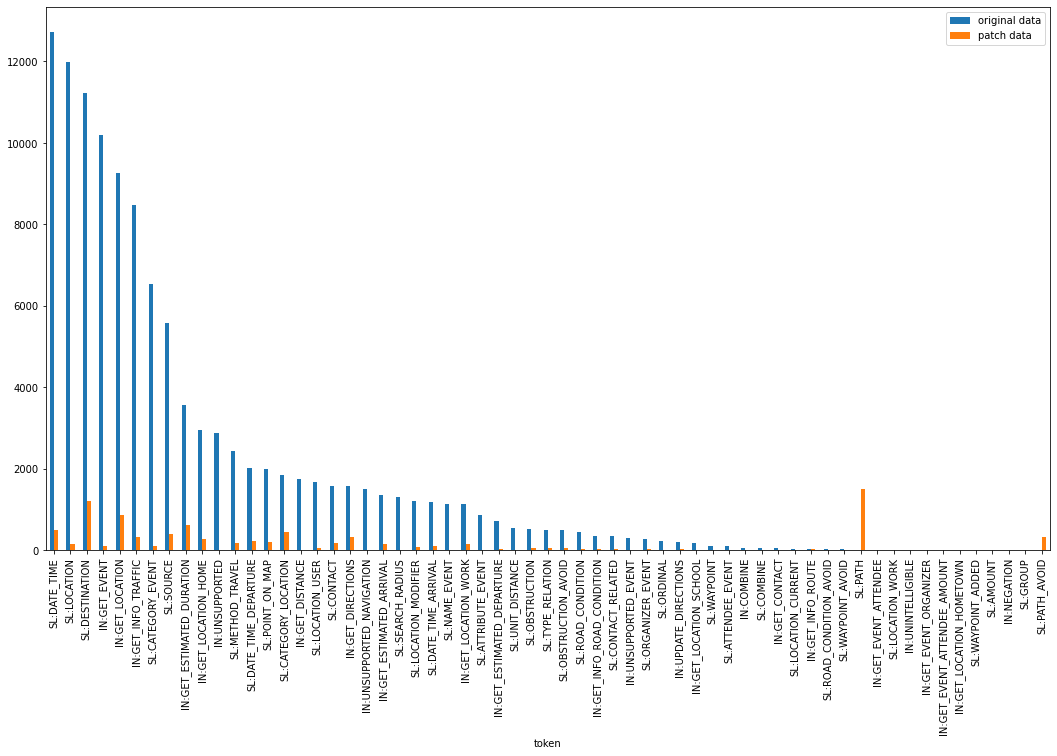

In [38]:
labels, values_big = zip(*frequencies_big.most_common())

values_small = [frequencies_small[l] for l in labels]

_plot_df = pd.DataFrame({'token': labels, 'original data': values_big, 'patch data': values_small})

_plot_df.plot('token', ['original data', 'patch data'], kind='bar', figsize=(18, 10))

In [74]:
small_subset_classes = [l for l, v_big, v_small in zip(labels, values_big, values_small) if v_small > 1.5 * v_big]
small_subset_classes

['IN:GET_LOCATION',
 'IN:GET_LOCATION_HOME',
 'SL:POINT_ON_MAP',
 'SL:CATEGORY_LOCATION',
 'SL:CONTACT',
 'SL:LOCATION_USER',
 'SL:SEARCH_RADIUS',
 'SL:LOCATION_MODIFIER',
 'IN:GET_LOCATION_WORK',
 'SL:TYPE_RELATION',
 'SL:CONTACT_RELATED',
 'SL:WAYPOINT',
 'IN:GET_LOCATION_SCHOOL',
 'IN:GET_INFO_ROUTE',
 'SL:LOCATION_CURRENT',
 'SL:LOCATION_WORK']

In [77]:
import os

In [80]:
os.makedirs('../data/splits/get_location_80_20/subset80')
os.makedirs('../data/splits/get_location_80_20/subset20')

big_subset.to_csv('../data/splits/get_location_80_20/subset80/train.tsv', sep='\t', index=False)
small_subset.to_csv('../data/splits/get_location_80_20/subset20/train.tsv', sep='\t', index=False)

In [83]:
len(big_subset), len(small_subset)

(23190, 8089)